<h1><center>Prediksi Harga Jual Bitcoin saat Bursa Tutup Menggunakan Jaringan Syaraf Tiruan</center></h1>
<center>I Made Adhi Aryadi-140310210040<center>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() #memanggil tensorflow dan mengabaikan warning

df = pd.read_csv('btc.csv') # membaca data
df= df.sort_values(by=['Date']) #mengurutkan data sesuai tanggal
df = df.drop(['Date','Open'],axis=1) #mengeluarkan variable tak perlu
df = df.dropna(inplace=False)  #membersihkan data dari nan

df_train = df[:2992]   # 60% dari jumlah data digunakan untuk train (total data: 4988)
df_test = df[2992:]    # 40% data digunakan untuk test (total data : 4988)
scaler = MinMaxScaler()

#denormalisasi data
def denormalisasi(df, norm_data):
    scl = MinMaxScaler()
    df_close = df['Close'].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl.fit_transform(df_close)
    new = scl.inverse_transform(norm_data)
    return new

# Mengarahkan output yang diinginkan pada kolom 'close'
X_train = scaler.fit_transform(df_train.drop(['Close'], axis=1).values)
y_train = scaler.fit_transform(df_train['Close'].values.reshape(-1,1)).reshape(-1)

X_test = scaler.fit_transform(df_test.drop(['Close'], axis=1).values)
y_test = scaler.fit_transform(df_test['Close'].values.reshape(-1,1)).reshape(-1)

Serangkaian syntax diatas berfungsi untuk membersihkan data agar siap digunakan, kemudian diambil nilai input yang memungkinkan memengaruhi nilai output berdasarkat dataset di atas.

In [47]:
def neural_net_model(X_data,input_dim):
    W_1 = tf.Variable(tf.random_uniform([input_dim,10]))
    b_1 = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data,W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)

    # layer 1 
    W_2 = tf.Variable(tf.random_uniform([10,10]))
    b_2 = tf.Variable(tf.zeros([10]))
    layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)
    # layer 2 
    W_O = tf.Variable(tf.random_uniform([10,1]))
    b_O = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_2,W_O), b_O)

    return output

Serangkaian syntax diatas berperan membentuk jaringan syaraf yang terdiri atas 2 hiden layer dan 1 layer output. tensorflow digunakan untuk mendefinisikan variabel yang akan digunakan.

In [48]:
xs = tf.placeholder("float")
ys = tf.placeholder("float")
output = neural_net_model(xs,3) #melakukan feed forward terhadap kondisi awal
cost = tf.reduce_mean(tf.square(output-ys))
# our mean squared error cost function
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

Epoch : 0 Kenaikan/penurunan : 0.07181472
Epoch : 1 Kenaikan/penurunan : 0.049803123
Epoch : 2 Kenaikan/penurunan : 0.04674069
Epoch : 3 Kenaikan/penurunan : 0.04610996
Epoch : 4 Kenaikan/penurunan : 0.045499947
Epoch : 5 Kenaikan/penurunan : 0.04511981
Epoch : 6 Kenaikan/penurunan : 0.044890687
Epoch : 7 Kenaikan/penurunan : 0.044761468
Epoch : 8 Kenaikan/penurunan : 0.044676505
Epoch : 9 Kenaikan/penurunan : 0.04462732
Epoch : 10 Kenaikan/penurunan : 0.044601288
Epoch : 11 Kenaikan/penurunan : 0.044604305
Epoch : 12 Kenaikan/penurunan : 0.04461292
Epoch : 13 Kenaikan/penurunan : 0.044624843
Epoch : 14 Kenaikan/penurunan : 0.044620477
Epoch : 15 Kenaikan/penurunan : 0.044620667
Epoch : 16 Kenaikan/penurunan : 0.044610955
Epoch : 17 Kenaikan/penurunan : 0.044618815
Epoch : 18 Kenaikan/penurunan : 0.044676207
Epoch : 19 Kenaikan/penurunan : 0.04476284
Epoch : 20 Kenaikan/penurunan : 0.044877864
Epoch : 21 Kenaikan/penurunan : 0.045039766
Epoch : 22 Kenaikan/penurunan : 0.04519662
Epoch 

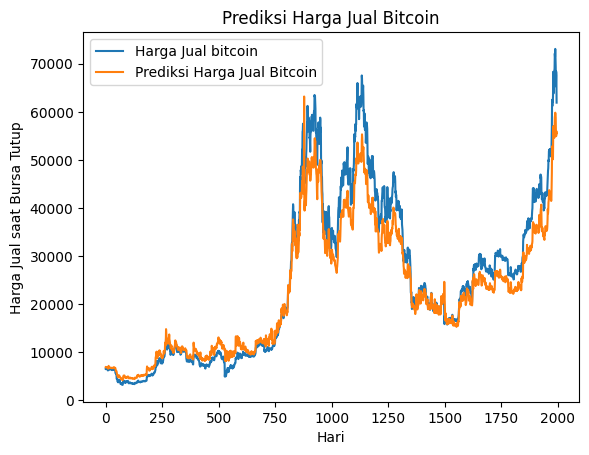

In [ ]:
c_t=[]
c_test=[]
with tf.Session() as sess:
    # Initiate session and initialize all vaiables
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver() #menyimpan hasil koreksi bobot
    for i in range(200):
        #perulangan ini akan membalikan fungsi matrix kembali agar terjadi koreksi backpropagation
        for j in range(X_train.shape[0]):
            sess.run([cost,train],feed_dict={xs:X_train[j,:].reshape(1,3), ys:y_train[j]})
        c_t.append(sess.run(cost, feed_dict={xs:X_train,ys:y_train}))
        c_test.append(sess.run(cost, feed_dict={xs:X_test,ys:y_test}))
        print('Epoch :',i,'Kenaikan/penurunan :',c_t[i])
    pred = sess.run(output, feed_dict={xs:X_test})
    # melakukan Feed Forward kembali dengan bobot yang diperbaharui
    print('Prediksi Peningkatan Harga Jual Bitcoin :',sess.run(cost, feed_dict={xs:X_test,ys:y_test}))
    y_test = denormalisasi(df_test,y_test)
    pred = denormalisasi(df_test,pred)
    error=np.mean(y_test-pred)
    plt.plot(range(y_test.shape[0]),y_test,label="Harga Jual bitcoin")
    plt.plot(range(y_test.shape[0]),pred,label="Prediksi Harga Jual Bitcoin")
    plt.legend(loc='best')
    plt.ylabel('Harga Jual saat Bursa Tutup')
    plt.xlabel('Hari')
    plt.title('Prediksi Harga Jual Bitcoin')
    plt.show()